<a href="https://colab.research.google.com/github/SolNam-UI/CTD/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install 부

In [15]:
!pip install quickdraw Pillow tensorflow scipy

In [16]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/CNNimals/storage"
%run 8409b3feec20f159d8a50b0a811d3bca/draw.py #Colab 환경에서 사용자가 그릴 수 있게 해주는 오픈소스

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CNNimals/storage


<Figure size 640x480 with 0 Axes>

CNN (최초 1회 실행)

In [34]:
import numpy as np
import PIL.Image
import tensorflow as tf
from PIL import Image
from quickdraw import QuickDrawData, QuickDrawDataGroup
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, verbose=1)

# 이미지 데이터 불러오기
trainList = QuickDrawData().drawing_names[:10]
trainImg, trainLabel = [], []

for i, label in enumerate(trainList):
    drawings = list(QuickDrawDataGroup(label).drawings)[:1000]
    for d in drawings:
        img = d.image.resize((28, 28)).convert("L")
        img_array = np.array(img) / 255.0
        trainImg.append(img_array)
        trainLabel.append(i)

trainImg = np.array(trainImg).reshape(-1, 28, 28, 1)
trainLabel = np.array(trainLabel)

X_train, X_val, y_train, y_val = train_test_split(trainImg, trainLabel, test_size=0.2, stratify=trainLabel)

# 모델 정의
model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stop, checkpoint])
model.save("QuickDraw_Classify.keras")

loading aircraft carrier drawings
load complete
loading airplane drawings
load complete
loading alarm clock drawings
load complete
loading ambulance drawings
load complete
loading angel drawings
load complete
loading animal migration drawings
load complete
loading ant drawings
load complete
loading anvil drawings
load complete
loading apple drawings
load complete
loading arm drawings
load complete
Epoch 1/100
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0971 - loss: 2.3058
Epoch 1: val_loss improved from inf to 2.20381, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.0973 - loss: 2.3057 - val_accuracy: 0.1915 - val_loss: 2.2038 - learning_rate: 0.0010
Epoch 2/100
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2829 - loss: 2.0171
Epoch 2: val_loss improved from 2.20381 to 1.55385, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2833 - loss: 2.0159 - val_accuracy: 0.4710 - val_loss: 1.5

그림 그리고 예측 프로그램부

목표 그림:  alarm clock


<IPython.core.display.Javascript object>

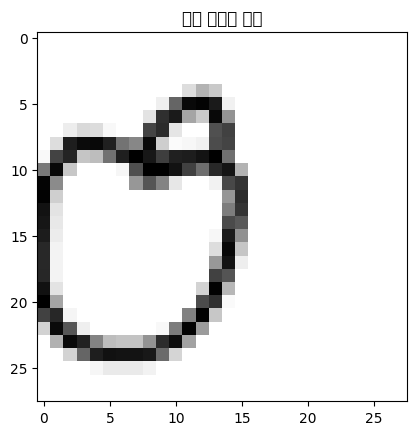

입력 배열 평균: 0.8929921968787515
입력 배열 최대값: 1.0
그림을 분석 중입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[3.8613123e-03 1.3869128e-07 9.1527623e-01 6.2924467e-02 1.7403474e-02
  3.7147728e-04 1.1348118e-04 1.4053626e-05 3.5470242e-05 1.3683520e-10]]
2
목표 그림은alarm clock이고 정답은alarm clock입니다.
성공!


In [41]:
import random
import time
import os
import ast
import PIL.Image
import matplotlib.pyplot as plt
from quickdraw import QuickDrawData
from tensorflow.keras.models import load_model

# 학습된 모델, 훈련데이터 리스트 불러오기
model = load_model("/content/drive/MyDrive/CNNimals/storage/QuickDraw_Classify.keras")

trainList = QuickDrawData().drawing_names[:10]

# 이미지 전처리
def prepDrawing():
    img = PIL.Image.open(img_path).resize((28, 28)).convert("RGBA")
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask=img.split()[3])
    gray_img = background.convert("L")
    imgTemp = np.array(gray_img) / 255.0
    inData = imgTemp.reshape(1, 28, 28, 1)

    plt.imshow(gray_img, cmap='gray')
    plt.title("그린 이미지 확인")
    plt.show()
    os.remove(img_path)

    print("입력 배열 평균:", np.mean(inData))
    print("입력 배열 최대값:", np.max(inData))
    print("그림을 분석 중입니다.")
    time.sleep(1)
    predict(inData)

def predict(inData):
    # 예측
    prediction = model.predict(inData)
    print(prediction)
    print(np.argmax(prediction))
    result = trainList[np.argmax(prediction)]
    print("목표 그림은" + goalImg + "이고 정답은"+ result + "입니다.")
    #os.remove(img_path)
    if (result == goalImg) :
        print("성공!")
    else:
        print("실패!")

# 이미지 리스트에서 그릴 이미지 할당
goalImg = random.choice(trainList)
print("목표 그림: ", goalImg)

drawingsName = "drawings.png"
img_path = "/content/drive/MyDrive/CNNimals/storage/drawings.png"
draw(filename=drawingsName , w=280, h=280, line_width=12)
prepDrawing()